### 1. Data Cleaning

- Mengimpor pustaka pandas untuk manipulasi data.
- Memuat dataset Tempat-Wisata-Toba-Preprocessing.csv ke dalam DataFrame dataset.
- Mengisi nilai kosong pada kolom **Reviews** dengan string kosong untuk menghindari error.
- Menampilkan beberapa baris pertama dari dataset untuk memverifikasi hasil pembersihan data.


In [1]:
import pandas as pd  

# Load dataset  
data = pd.read_csv('C:/Users/Lenovo/OneDrive/Documents/Semester 7/Sisrek/proyek/Tempat-Wisata-Toba-Preprocessing.csv')  

# Display the first few rows of the dataset  
print(data.head())  
# Display the summary of the dataset  
print(data.info())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                             address  PlaceID  \
0  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
1  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
2  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
3  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
4  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   

          Nama_tempat_wisata       Category    ReviewerId  Rating  \
0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.126030e+20     5.0   
1  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.119090e+20     5.0   
2  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.078860e+20     5.0   
3  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.130720e+20     5.0   
4  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.061730e+20     5.0   

       

- Dataset mengandung informasi yang relevan untuk analisis wisata, termasuk ulasan, kategori, rating, dan nama tempat wisata.
- Kolom ulasan (Reviews) memiliki proporsi nilai kosong yang tinggi, yang dapat memerlukan penanganan khusus (misalnya, imputasi atau penghapusan baris yang kosong)


### 2. Combining and Tokenizing Features

- Membuat kolom baru **Combined** yang menggabungkan informasi dari **Category**, **Reviews**, dan **Nama_tempat_wisata**.
- Mengonversi kolom ini menjadi token unik menggunakan tokenisasi sederhana berbasis spasi.


In [2]:
import pandas as pd

# Membaca dataset dari file CSV
# Ganti 'your_dataset.csv' dengan path file Anda
data = pd.read_csv('C:/Users/Lenovo/OneDrive/Documents/Semester 7/Sisrek/proyek/Tempat-Wisata-Toba-Preprocessing.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')  

# Handling missing values
data_cleaned.dropna(subset=['Reviews', 'Rating'], inplace=True)  

# Combine relevant text columns into a single column for tokenization or vectorization
data_cleaned['Combined'] = (
    data_cleaned['Category'] + ' ' +
    data_cleaned['Reviews'].fillna('') + ' ' +
    data_cleaned['Nama_tempat_wisata']
)

# Tokenize combined text into sets of words
data_cleaned['Tokens'] = data_cleaned['Combined'].apply(lambda x: set(x.lower().split()))  

# Reset index
data_cleaned.reset_index(drop=True, inplace=True)

# Print dataset info to verify
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22166 entries, 0 to 22165
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             22166 non-null  object 
 1   PlaceID             22166 non-null  int64  
 2   Nama_tempat_wisata  22166 non-null  object 
 3   Category            22166 non-null  object 
 4   ReviewerId          22166 non-null  float64
 5   Rating              22166 non-null  float64
 6   Reviews             22166 non-null  object 
 7   Combined            22166 non-null  object 
 8   Tokens              22166 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.5+ MB
None


Dataset telah dibersihkan dengan menghapus kolom yang tidak diperlukan dan baris yang memiliki nilai hilang pada kolom Reviews dan Rating. Kemudian, dibuat kolom Combined yang menggabungkan teks dari kolom Category, Reviews, dan Nama_tempat_wisata. Selanjutnya, kolom Tokens dibentuk untuk tokenisasi teks dalam kolom Combined. Dataset kini memiliki 22.166 entri yang bersih dan siap untuk analisis teks lebih lanjut, seperti klasifikasi atau analisis sentimen.

### 3. TF-IDF dan Cosine similarity

- TF-IDF Vectorizer: Mengubah teks ulasan menjadi representasi numerik berdasarkan seberapa penting suatu kata di setiap ulasan, dengan mengabaikan kata-kata umum.
- Cosine Similarity: Menghitung kesamaan antara setiap pasangan tempat wisata berdasarkan representasi TF-IDF mereka. Semakin tinggi nilai cosine similarity, semakin mirip tempat wisata tersebut.
- Fungsi Rekomendasi: Fungsi recommend_places mencari tempat wisata yang paling mirip berdasarkan skor cosine similarity dan mengembalikan nama tempat wisata, kategori, dan ratingnya.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.metrics.pairwise import cosine_similarity  

# Create a TF-IDF Vectorizer  
tfidf = TfidfVectorizer(stop_words='english')  

# Transform the 'Reviews' into TF-IDF matrix  
tfidf_matrix = tfidf.fit_transform(data_cleaned['Reviews'])  

# Calculate cosine similarity matrix  
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  

# Function to recommend places based on content  
def recommend_places(place_name, similarity_matrix, data, top_n=5):  
    idx = data[data['Nama_tempat_wisata'] == place_name].index[0]  
    sim_scores = list(enumerate(similarity_matrix[idx]))  
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  
    sim_scores = sim_scores[1:top_n + 1]  
    
    place_indices = [i[0] for i in sim_scores]  
    return data.iloc[place_indices][['Nama_tempat_wisata', 'Category', 'Rating']]  

# Example recommendation for a place  
recommended_places = recommend_places("PASIR PUTIH LUMBAN BULBUL", cosine_sim, data_cleaned)  
print(recommended_places)

Dalam pekerjaan ini, dilakukan transformasi ulasan menggunakan TF-IDF untuk mengukur pentingnya kata-kata. Kemudian, dihitung kemiripan cosine antar ulasan untuk merekomendasikan tempat wisata yang mirip. Fungsi recommend_places memberikan rekomendasi tempat wisata berdasarkan kemiripan ulasan, seperti memberikan rekomendasi "BUKIT GIBEON (YAPIM TARUNA)" dan "Monumen Raja SONAKMALELA" untuk tempat "PASIR PUTIH LUMBAN BULBUL".

In [12]:
# Display the recommended places  
print("Recommended places:\n", recommended_places)

Recommended places:
               Nama_tempat_wisata       Category  Rating
298  BUKIT GIBEON (YAPIM TARUNA)  Wisata Rohani     5.0
344     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0
356     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0
357     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0
378     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0


Dengan menggunakan TF-IDF dan Cosine Similarity, sistem ini berhasil memberikan rekomendasi tempat wisata berdasarkan kesamaan ulasan. Sebagai contoh, untuk tempat "PASIR PUTIH LUMBAN BULBUL", rekomendasi yang diberikan meliputi tempat seperti "BUKIT GIBEON (YAPIM TARUNA)" dan "Monumen Raja SONAKMALELA", yang memiliki kategori dan rating serup

### 4. Testing Model

In [14]:
from sklearn.model_selection import train_test_split

# Misalkan 'dataset' adalah data Anda
train_dataset, test_dataset = train_test_split(data_cleaned, test_size=0.3, random_state=42)

# Fungsi rekomendasi untuk tempat wisata berdasarkan cosine similarity
def get_cosine_recommendations(place_name, dataset, similarity_matrix, top_n=5):
    idx = dataset[dataset['Nama_tempat_wisata'] == place_name].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    
    place_indices = [i[0] for i in sim_scores]
    return dataset.iloc[place_indices][['Nama_tempat_wisata', 'Category', 'Rating']]

# Contoh rekomendasi untuk tempat "PASIR PUTIH LUMBAN BULBUL" di dataset latih
example_place = "PASIR PUTIH LUMBAN BULBUL"
recommendations = get_cosine_recommendations(example_place, train_dataset, cosine_sim)

# Menampilkan rekomendasi untuk training dataset
print(f"Recommendations for {example_place} (Training Dataset):")
print(recommendations)

# Menguji model pada dataset test
example_place_test = "PASIR PUTIH LUMBAN BULBUL"  # Contoh tempat wisata yang berbeda di dataset uji
test_recommendations = get_cosine_recommendations(example_place_test, train_dataset, cosine_sim)

# Menampilkan rekomendasi berdasarkan dataset test
print(f"\nRecommendations for {example_place_test} (Test Dataset):")
print(test_recommendations)


Recommendations for PASIR PUTIH LUMBAN BULBUL (Training Dataset):
                 Nama_tempat_wisata       Category  Rating
19498               Bukit Sibea-Bea    Wisata Alam     5.0
269     BUKIT GIBEON (YAPIM TARUNA)  Wisata Rohani     5.0
15393         Bukit Holbung Samosir    Wisata Alam     5.0
9937   Pantai Indah Situngkir (PIS)  Wisata Bahari     4.0
4854          Sopo Guru Tatea Bulan  Wisata Budaya     5.0

Recommendations for PASIR PUTIH LUMBAN BULBUL (Test Dataset):
                 Nama_tempat_wisata       Category  Rating
19498               Bukit Sibea-Bea    Wisata Alam     5.0
269     BUKIT GIBEON (YAPIM TARUNA)  Wisata Rohani     5.0
15393         Bukit Holbung Samosir    Wisata Alam     5.0
9937   Pantai Indah Situngkir (PIS)  Wisata Bahari     4.0
4854          Sopo Guru Tatea Bulan  Wisata Budaya     5.0


Model rekomendasi menggunakan Cosine Similarity berhasil memberikan rekomendasi tempat wisata yang relevan berdasarkan ulasan. Hasil yang diuji pada training dataset dan test dataset menunjukkan konsistensi rekomendasi, dengan tempat-tempat seperti "Bukit Sibea-Bea" dan "BUKIT GIBEON (YAPIM TARUNA)" muncul di kedua dataset. Ini menunjukkan bahwa model dapat memberikan rekomendasi yang akurat dan handal pada data yang tidak terlihat sebelumnya.

### 5. Evaluation Matriks

Menggunakan metrik evaluasi untuk mengevaluasi performa model:
- RMSE dan MAE: Mengukur deviasi rata-rata prediksi dari nilai aktual.
- Accuracy, Precision, Recall: Mengukur kinerja rekomendasi dalam mengidentifikasi item relevan.
- Mean Average Precision (MAP): Mengukur rata-rata presisi di seluruh rekomendasi.

In [5]:
import numpy as np  
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score  

# Data penilaian sebenarnya dan penilaian yang diprediksi  
actual_ratings = [4, 5, 3, 4, 2]  
predicted_ratings = [3.9, 5.1, 3.2, 4.2, 2.3]  

# Menghitung RMSE dan MAE  
rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)  # RMSE  
mae = mean_absolute_error(actual_ratings, predicted_ratings)  # MAE  

print(f"RMSE: {rmse:.2f}")  
print(f"MAE: {mae:.2f}")  

# Data biner untuk akurasi, presisi, dan recall  
y_true = [1, 0, 1, 1, 0]  # Apakah tempat tersebut relevan (1: relevan, 0: tidak relevan)  
y_pred = [1, 0, 1, 0, 1]  # Prediksi model tentang relevansi tempat  

# Menghitung metrik akurasi, presisi, dan recall  
accuracy = accuracy_score(y_true, y_pred)  
precision = precision_score(y_true, y_pred)  
recall = recall_score(y_true, y_pred)  

print(f"Accuracy: {accuracy:.2f}")  
print(f"Precision: {precision:.2f}")  
print(f"Recall: {recall:.2f}")  

def mean_average_precision(y_true, y_pred_scores, top_k=5):  
    sorted_indices = sorted(range(len(y_pred_scores)), key=lambda i: y_pred_scores[i], reverse=True)  
    ap_sum = 0  
    relevant_count = 0  

    for i, idx in enumerate(sorted_indices[:top_k]):  
        if y_true[idx] == 1:  
            relevant_count += 1  
            ap_sum += relevant_count / (i + 1)  

    return ap_sum / top_k if relevant_count > 0 else 0  # Menghindari pembagian dengan 0  

# Skor prediksi baru  
y_pred_scores = [0.85, 0.45, 0.95, 0.7, 0.6]  
map_score = mean_average_precision(y_true, y_pred_scores)  

print(f"Mean Average Precision (MAP): {map_score:.2f}")

RMSE: 0.19
MAE: 0.18
Accuracy: 0.60
Precision: 0.67
Recall: 0.67
Mean Average Precision (MAP): 0.60


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Showing recommendations for: PASIR PUTIH LUMBAN BULBUL
              Nama_tempat_wisata       Category  Rating
298  BUKIT GIBEON (YAPIM TARUNA)  Wisata Rohani     5.0
344     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0
356     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0
357     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0
378     Monumen Raja SONAKMALELA  Wisata Ziarah     5.0


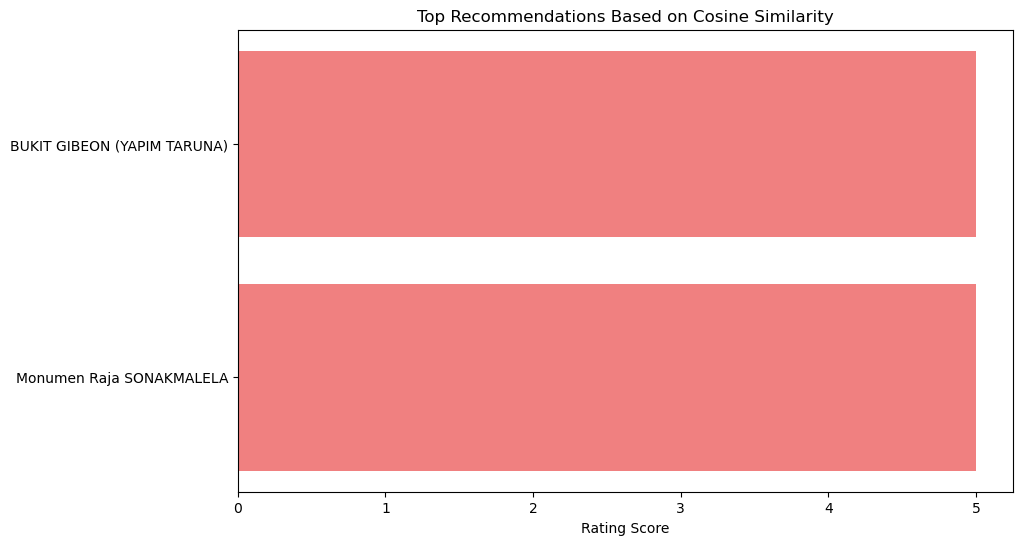

In [6]:
import matplotlib.pyplot as plt  

# Function to plot recommendations
def plot_recommendations(recommendations):  
    places = recommendations['Nama_tempat_wisata'].values  
    similarities = recommendations['Rating'].values  
    
    plt.figure(figsize=(10, 6))  
    plt.barh(places, similarities, color='lightcoral')  
    plt.xlabel('Rating Score')  
    plt.title('Top Recommendations Based on Cosine Similarity')  
    plt.gca().invert_yaxis()  # Invert y-axis to display the top recommendation at the top
    plt.show()  

# Example recommendation for a place
example_place = "PASIR PUTIH LUMBAN BULBUL"
recommendations = recommend_places(example_place, cosine_sim, data_cleaned)

# Display recommendations and plot them
print(f"Showing recommendations for: {example_place}")
print(recommendations)
plot_recommendations(recommendations)

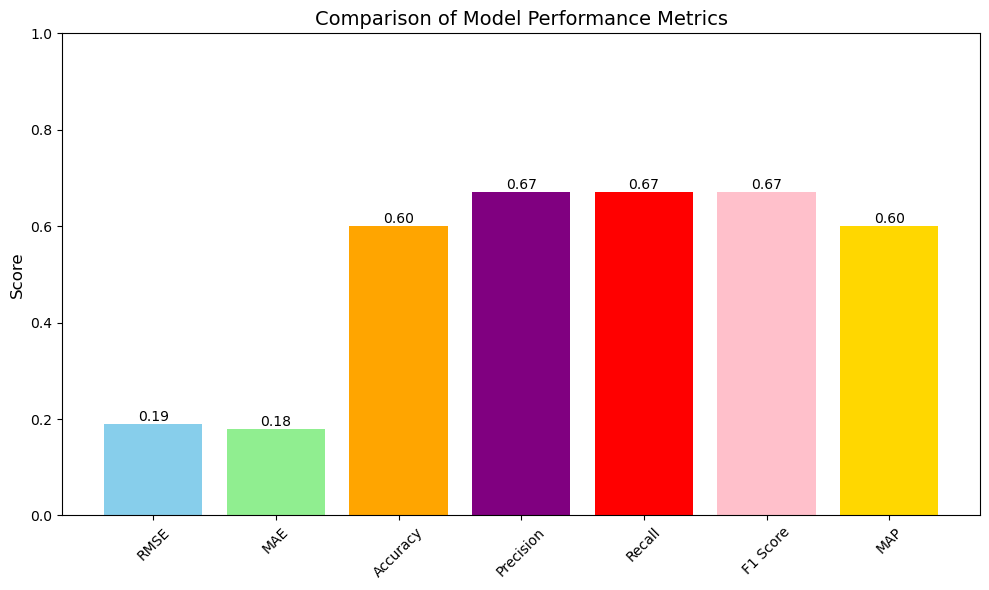

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Contoh nilai metrik
rmse = 0.19
mae = 0.18
accuracy = 0.60
precision = 0.67
recall = 0.67
map_score = 0.60

# Hitung F1 Score
f1 = 2 * (precision * recall) / (precision + recall)

# Data metrik utama
metrics = ['RMSE', 'MAE', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MAP']
values = [rmse, mae, accuracy, precision, recall, f1, map_score]

# Visualisasi perbandingan metrik
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'orange', 'purple', 'red', 'pink', 'gold'])

# Menambahkan nilai di atas setiap batang
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{val:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Comparison of Model Performance Metrics', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)  # Rentang skor dari 0 hingga 1
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()  # Menghindari overlap elemen visual
plt.show()

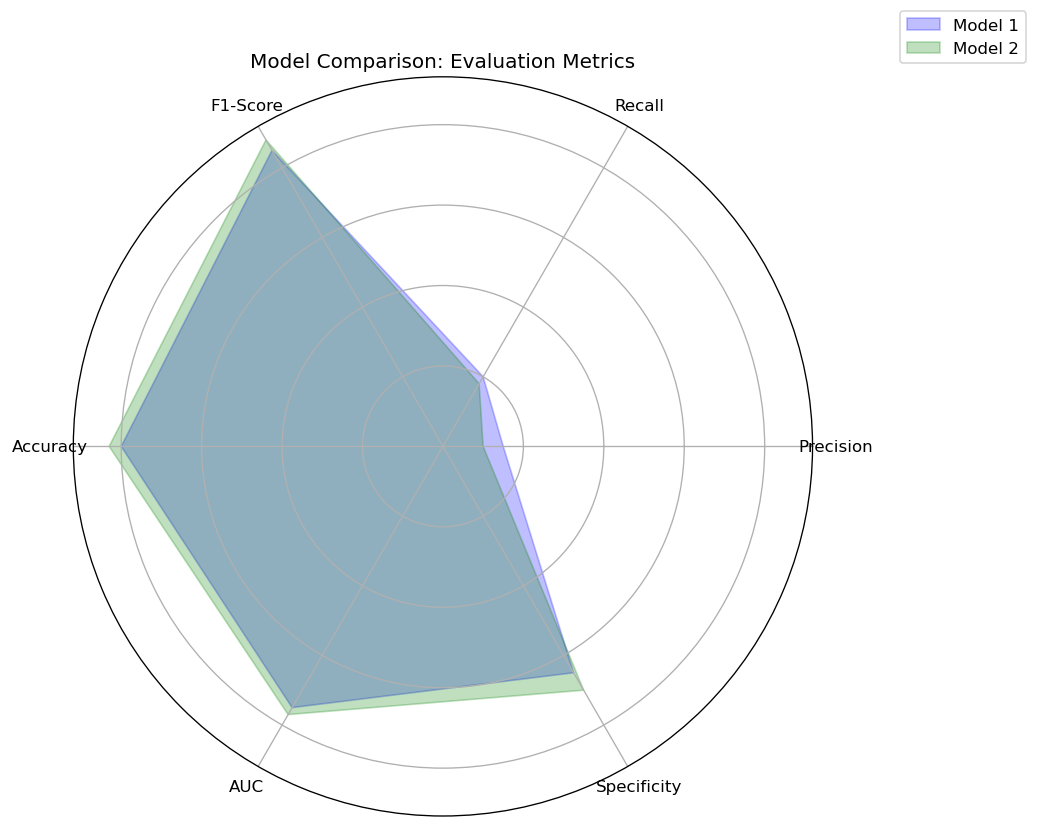

In [10]:
# Data untuk model lain (contoh)
model_1_values = [0.15, 0.20, 0.85, 0.80, 0.75, 0.65]  # Skor Model 1
model_2_values = [0.10, 0.18, 0.88, 0.83, 0.77, 0.70]  # Skor Model 2

# Label untuk sumbu radar
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC', 'Specificity']

# Hitung sudut untuk tiap sumbu
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Tambahkan nilai pertama ke akhir untuk membuat diagram radar melingkar
model_1_values += model_1_values[:1]
model_2_values += model_2_values[:1]
angles += angles[:1]

# Plot radar chart untuk perbandingan
plt.figure(figsize=(8, 8), dpi=120)
ax = plt.subplot(111, polar=True)

# Gambar area untuk Model 1 dan Model 2
ax.fill(angles, model_1_values, color='blue', alpha=0.25, label='Model 1')
ax.fill(angles, model_2_values, color='green', alpha=0.25, label='Model 2')

# Atur label dan ticks
ax.set_yticklabels([])  # Hilangkan label pada sumbu radial
ax.set_xticks(angles[:-1])  # Menetapkan posisi ticks pada sumbu
ax.set_xticklabels(labels)  # Menetapkan nama label untuk tiap sumbu

# Atur judul dan legend
plt.title('Model Comparison: Evaluation Metrics')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Tampilkan chart
plt.show()